In [21]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline


In [22]:
def find_closest_centroids(X , centroids):
    
    
    k = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype = int)
    
    
    for  i in range(X.shape[0]):
        distance=[]
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i]-centroids[j])
            distance.append(norm_ij)
            
        idx[i]= np.argmin(distance)
        
    return idx

In [46]:
X = load_data()

In [47]:
print("the first five element is ", X[:5])
print("the size of x is ", X.shape)

the first five element is  [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
the size of x is  (300, 2)


In [55]:
initial_centroids = np.array([[3,3],[6,2],[8,5]])

idx = find_closest_centroids(X, intial_centroids)

In [56]:
def compute_centroids(X, idx, K):
    m,n = X.shape
    centroids = np.zeros((K,n))
    for i in range(K):
        points= X[idx==i]
        centroids[i]= np.mean(points, axis= 0)
    return centroids

In [57]:
K=3 
centroids= compute_centroids(X , idx, K)
print(centroids)

[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [66]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    m,n = X.shape
    k = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)
    plt.figure(figsize=(8,6))
    
    
    for i in  range(max_iters):
        print(  i ,( max_iters-1))
        
        
        idx= find_closest_centroids(X, centroids)
        if plot_progress:
            plot_progress_kMeans(X,centroids,previous_centroids,idx ,K,i)
            previous_centroids = centroids
        centroids = compute_centroids(X,idx,K)
    plt.show()
    return centroids, idx
            

0 9
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
9 9


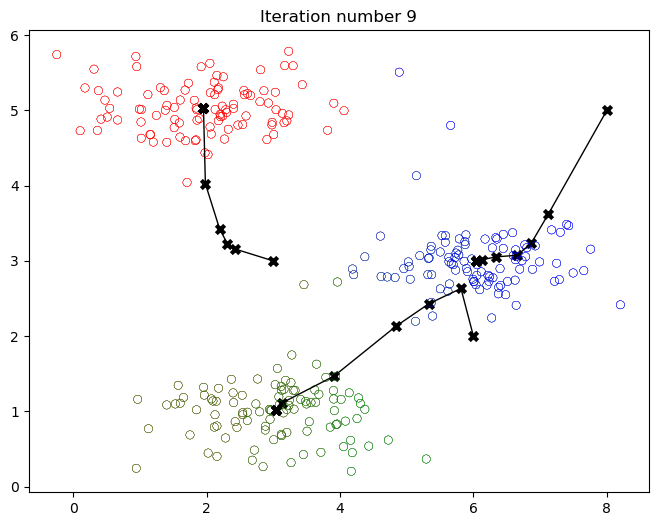

In [67]:
max_iters = 10
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

In [92]:
# Now we taking random points of centroids in k means clustering


def kMeans_init_centroids(X,K):
    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K],:]
    return centroids

0 9
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
9 9


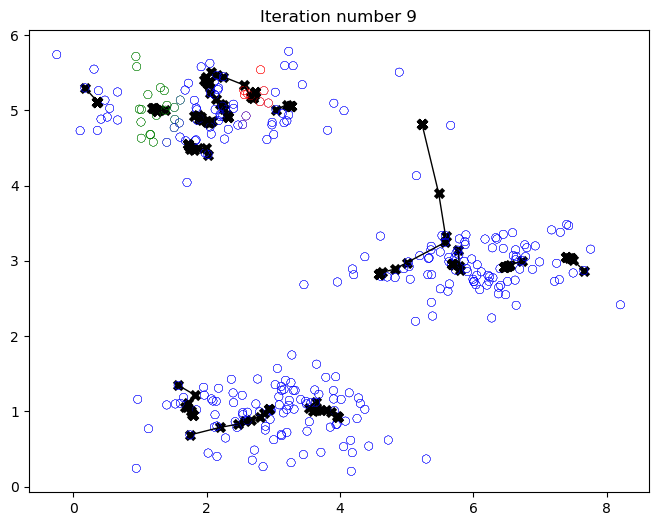

In [93]:
k = 3 
max_iters = 10
initial_centroids = kMeans_init_centroids(X,K)
centroids,idx = run_kMeans(X, initial_centroids,max_iters , plot_progress = True)

In [94]:
# now compressing image using k means clustering algorithm
orig_img = plt.imread('dev.png')

(499, 499, 3)


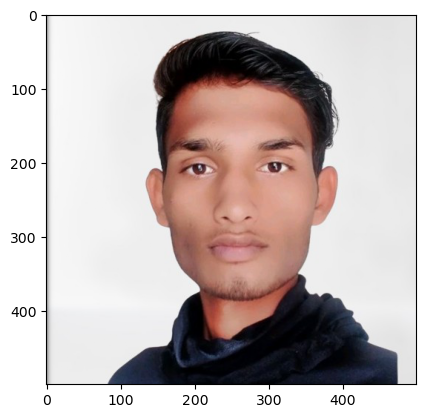

In [95]:
plt.imshow(orig_img)
print(orig_img.shape)

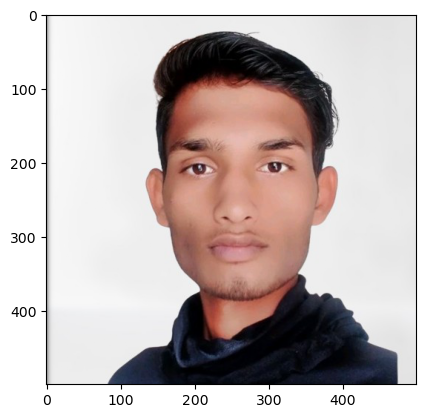

In [96]:
X_img = np.reshape(orig_img,(orig_img.shape[0]*orig_img.shape[1],3))
plt.imshow(orig_img)

In [97]:
K=16
max_iters = 10
initial_centroids = kMeans_init_centroids(X_img,K)
centroids,idx = run_kMeans(X_img,initial_centroids,max_iters)

0 9
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
9 9


<Figure size 800x600 with 0 Axes>

In [98]:
print(idx.shape)
print(idx[:5])

(249001,)
[1 1 1 1 1]


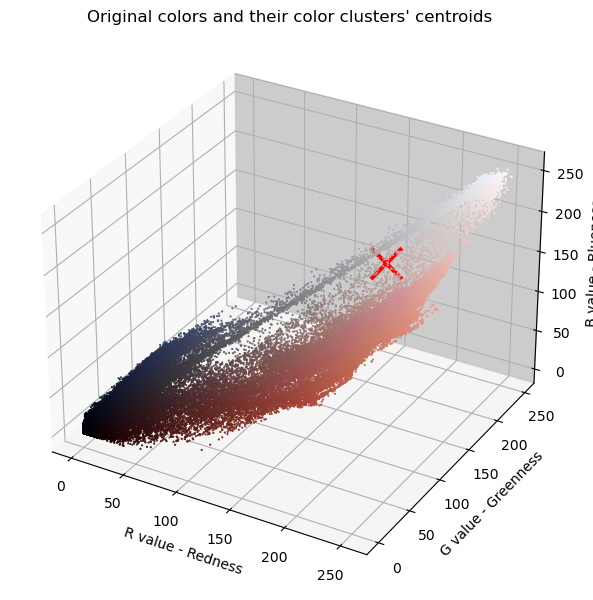

In [99]:
plot_kMeans_RGB(X_img,centroids,idx,K)

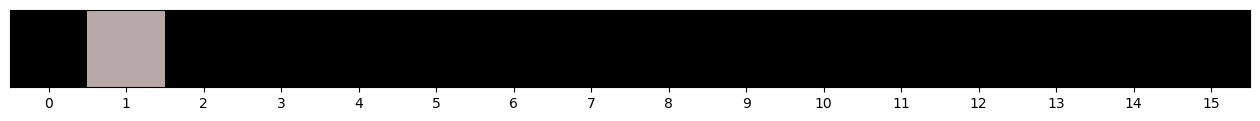

In [100]:
show_centroid_colors(centroids)

In [101]:
idx = find_closest_centroids(X_img,centroids)
X_recovered = centroids[idx,:]
X_recovered = np.reshape(X_recovered, orig_img.shape)

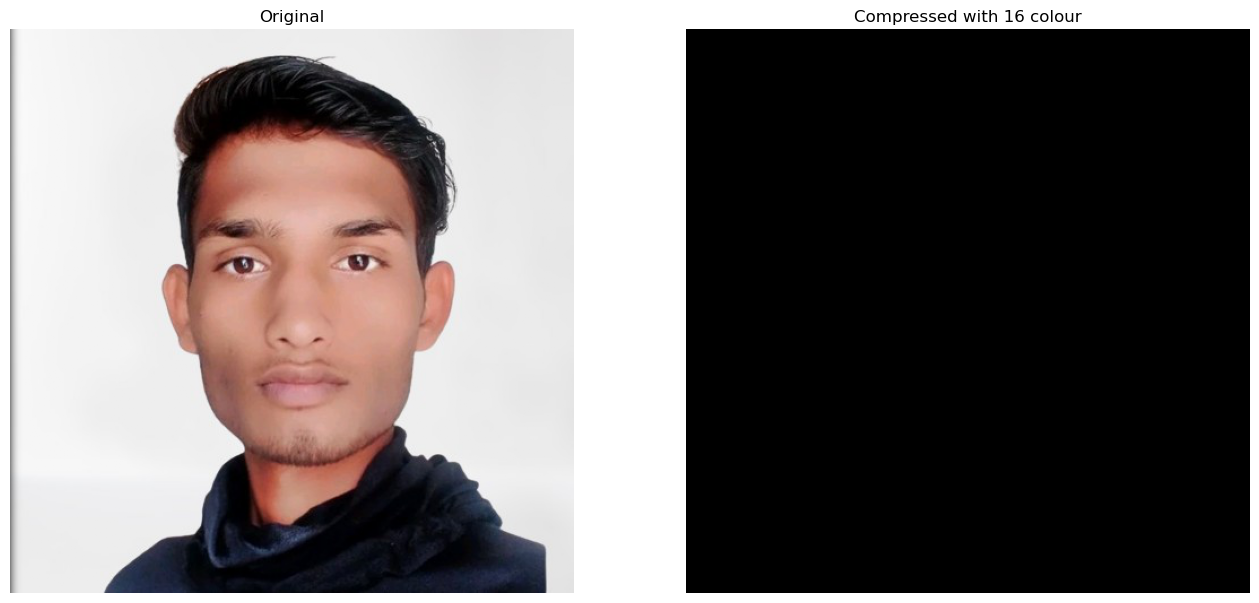

In [102]:
fig,ax = plt.subplots(1,2,figsize = (16,16))
plt.axis('off')

ax[0].imshow(orig_img)
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colour' %K)
ax[1].set_axis_off()